<a href="https://colab.research.google.com/github/CaduPortifolio/An-lise/blob/main/mod12_ex01_regress%C3%A3o_linear_simples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf

# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip']/(tips['total_bill']-tips['tip'])
tips['net_bill'] = tips['total_bill']-tips['tip']
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98
5,25.29,4.71,Male,No,Sun,Dinner,4,0.228863,20.58
6,8.77,2.00,Male,No,Sun,Dinner,2,0.295421,6.77
7,26.88,3.12,Male,No,Sun,Dinner,4,0.131313,23.76
8,15.04,1.96,Male,No,Sun,Dinner,2,0.149847,13.08
9,14.78,3.23,Male,No,Sun,Dinner,2,0.279654,11.55


(0.0, 10.5)

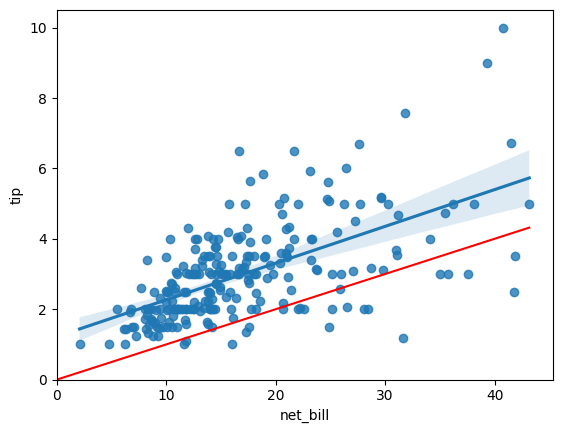

In [3]:
# Gráfico de dispersão
sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct']<.5])

# Gerando dados para a linha dos 10%
x = np.linspace(0,tips['net_bill'].max(),100)
y = .1*x

# Plotando a linha dos 10%
plt.plot(x, y, '-r', label='linha dos 10%')

# Opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [11]:
reg = smf.ols('tip ~ net_bill',data=tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           5.02e-23
Time:                        18:20:32   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

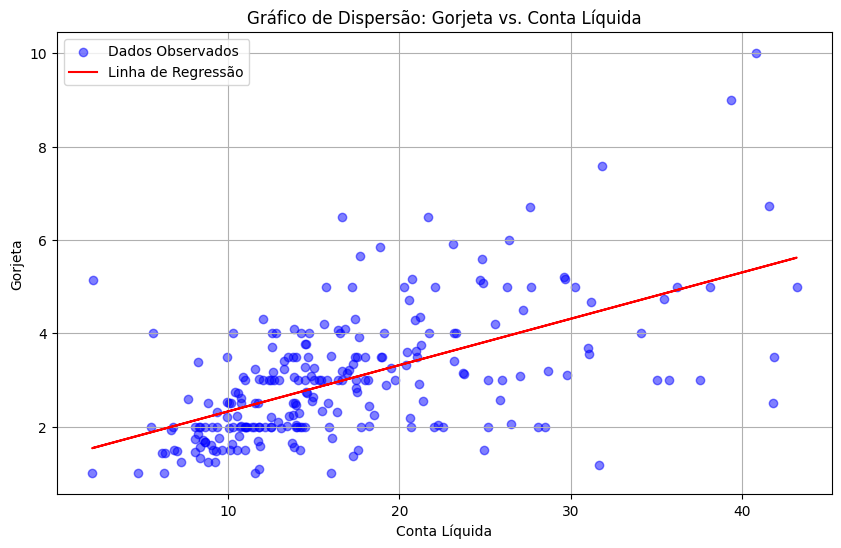

In [24]:
# Criar gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(tips['net_bill'], tips['tip'], color='blue', alpha=0.5, label='Dados Observados')

# Adicionar linha de regressão
x = tips['net_bill']
y = reg.predict(tips['net_bill'])
plt.plot(x, y, color='red', label='Linha de Regressão')

# Configurações do gráfico
plt.title('Gráfico de Dispersão: Gorjeta vs. Conta Líquida')
plt.xlabel('Conta Líquida')
plt.ylabel('Gorjeta')
plt.legend()
plt.grid(True)
plt.show()

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

Observando os dois gráfico é possível perceber uma correlação positiva entre as duas variáveis. No quesito gorjeta observamos que quanto mais elevado e o valor da conta maior é volaticidade do valor de gorjeta.

R-Quadrado: Pode ser considerado um modelo razoável, indicando que o modelo está capturando alguma relação entre as variáveis, mas ainda há espaço para melhorias

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [12]:
dados_novos = tips[0:5]
dados_novos

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [13]:
reg.predict(dados_novos)

,0
0,2.918050
1,2.192915
2,3.070031
3,3.354125
4,3.414719


In [17]:
new = smf.ols('tip ~ net_bill', data=dados_novos).fit()
new.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     2.745
Date:                Fri, 11 Oct 2024   Prob (F-statistic):              0.196
Time:                        19:11:45   Log-Likelihood:                -5.8172
No. Observations:                   5   AIC:                             15.63
Df Residuals:                       3   BIC:                             14.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1878      1.751     -0.107      0.921      -5.762       5.386
net_bill       0.1680      0.101      1.657      0.196      -0.155       0.491
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.379
Prob(Omnibus):                    nan   Jarque-Bera (JB):                1.202
Skew:                          -1.200   Prob(JB):                        0.548
Kurtosis:                       2.901   Cond. No.                         67.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
new.predict()

array([2.49638777, 1.27018708, 2.75338599, 3.2337879 , 3.33625125])

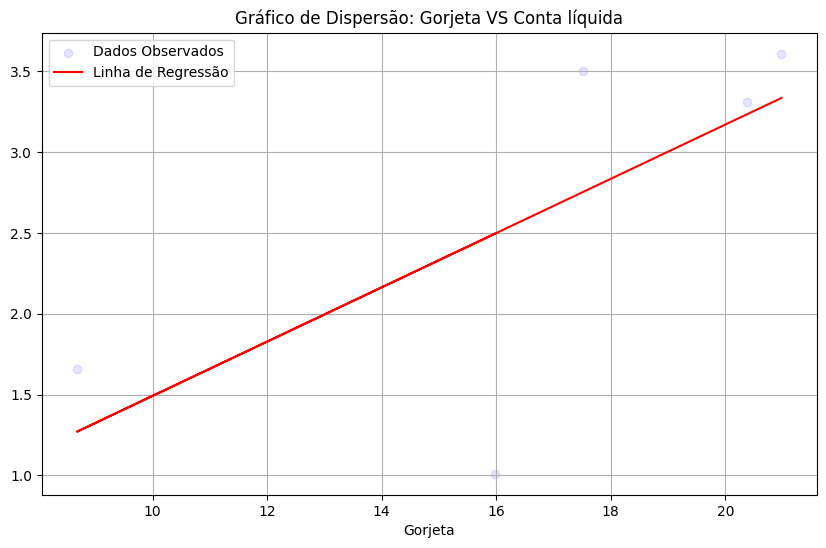

In [31]:
#Gráfico de Dispersão
plt.figure(figsize=(10, 6))
plt.scatter(dados_novos['net_bill'], dados_novos['tip'], color='blue', alpha=.1, label='Dados Observados')

# Criando linha de regressão
x = dados_novos['net_bill']
y = new.predict(dados_novos['net_bill'])
plt.plot(x, y, color='red', label= 'Linha de Regressão')

#Configurações do Gráfico
plt.title('Gráfico de Dispersão: Gorjeta VS Conta líquida')
plt.xlabel('Conta Líquida')
plt.xlabel('Gorjeta')
plt.legend()
plt.grid(True)
plt.show()

R² para tip: 0.4778315398349223
R² original (tip_pct): 0.006557772837587628


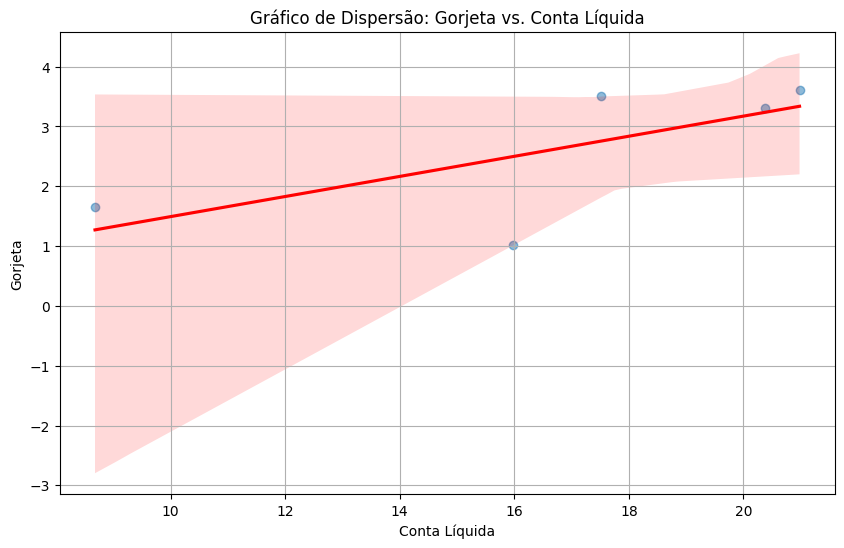

In [38]:
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que 'dados_novos' seja seu DataFrame e que já contém as colunas 'tip' e 'net_bill'

# Ajuste do modelo original para 'tip'
reg = smf.ols('tip ~ net_bill', data=dados_novos).fit()

# 1. Predição de tip_pct
dados_novos.loc[:, 'tip_pct'] = dados_novos['tip'] / dados_novos['net_bill']
reg_tip_pct = smf.ols('tip_pct ~ net_bill', data=dados_novos).fit()

# Obtendo as preditivas para tip_pct
pred_tip_pct = reg_tip_pct.fittedvalues

# 2. Cálculo do valor predito para tip
dados_novos.loc[:, 'pred_tip'] = pred_tip_pct * dados_novos['net_bill']

# 3. Ajuste do modelo para tip
reg_tip = sm.OLS(dados_novos['tip'], sm.add_constant(dados_novos['net_bill'])).fit()
r2_tip = reg_tip.rsquared

# 4. Comparação do R²
r2_tip_pct = reg_tip_pct.rsquared
print(f"R² para tip: {r2_tip}")
print(f"R² original (tip_pct): {r2_tip_pct}")

# Criar gráfico de dispersão com linha de regressão
plt.figure(figsize=(10, 6))
sns.regplot(x='net_bill', y='tip', data=dados_novos, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

# Configurações do gráfico
plt.title('Gráfico de Dispersão: Gorjeta vs. Conta Líquida')
plt.xlabel('Conta Líquida')
plt.ylabel('Gorjeta')
plt.grid(True)
plt.show()
